In [3]:
import pandas as pd

In [42]:
DATA_FILE = "../data/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_FILE)

In [43]:
print("Check whether data contains NULL values:", df.isnull().any().any())
print("Different types of data types: ", df.dtypes.unique())

Check whether data contains NULL values: False
Different types of data types:  [dtype('O') dtype('int64') dtype('float64')]


In [44]:
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']
Categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [45]:
print("High level statistics on numerical values:")
df[numerical_cols].describe()

High level statistics on numerical values:


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [46]:
categories_per_feature = {}
for col in categorical_cols:
    if col == "customerID":
        continue

    categories_per_feature[col] = df[col].unique().tolist()

categories_per_feature

{'gender': ['Female', 'Male'],
 'Partner': ['Yes', 'No'],
 'Dependents': ['No', 'Yes'],
 'PhoneService': ['No', 'Yes'],
 'MultipleLines': ['No phone service', 'No', 'Yes'],
 'InternetService': ['DSL', 'Fiber optic', 'No'],
 'OnlineSecurity': ['No', 'Yes', 'No internet service'],
 'OnlineBackup': ['Yes', 'No', 'No internet service'],
 'DeviceProtection': ['No', 'Yes', 'No internet service'],
 'TechSupport': ['No', 'Yes', 'No internet service'],
 'StreamingTV': ['No', 'Yes', 'No internet service'],
 'StreamingMovies': ['No', 'Yes', 'No internet service'],
 'Contract': ['Month-to-month', 'One year', 'Two year'],
 'PaperlessBilling': ['Yes', 'No'],
 'PaymentMethod': ['Electronic check',
  'Mailed check',
  'Bank transfer (automatic)',
  'Credit card (automatic)'],
 'TotalCharges': ['29.85',
  '1889.5',
  '108.15',
  '1840.75',
  '151.65',
  '820.5',
  '1949.4',
  '301.9',
  '3046.05',
  '3487.95',
  '587.45',
  '326.8',
  '5681.1',
  '5036.3',
  '2686.05',
  '7895.15',
  '1022.95',
  '7382

In [51]:
# Total charges seem to contain numerical data in string format, let's fix that
if "TotalCharges" not in numerical_cols:
    numerical_cols.append("TotalCharges")
    categorical_cols.remove("TotalCharges")

def convertToFloat(nr: str) -> float:
    try:
        value = float(nr)
    except ValueError:
        value = None

    return value
        
df["TotalCharges"] = df["TotalCharges"].apply(convertToFloat)

In [55]:
target_column = "Churn"


       count  proportion
Churn                   
No      5174        0.73
Yes     1869        0.27


<Axes: >

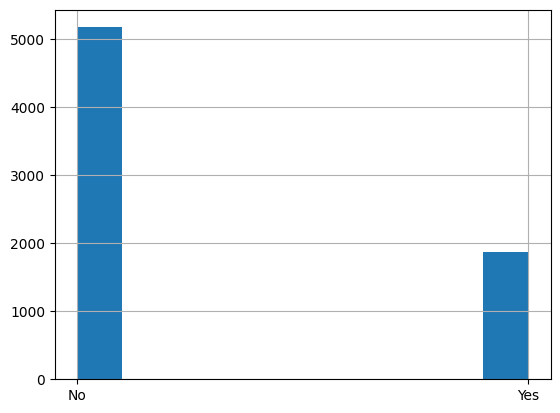

In [70]:
print(
    pd.concat(
        [
            df[target_column].value_counts(),
            df[target_column].value_counts(normalize=True)
        ], axis=1
    ).round(2)
)

df[target_column].hist()